In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data

In [17]:
(x_train, y_train), (x_test, y_test) = load_data()

In [18]:
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'x_test shape is {x_test.shape}')
print(f'y_test shape is {y_test.shape}')

x_train shape is (60000, 28, 28)
y_train shape is (60000,)
x_test shape is (10000, 28, 28)
y_test shape is (10000,)


<Figure size 2000x800 with 0 Axes>

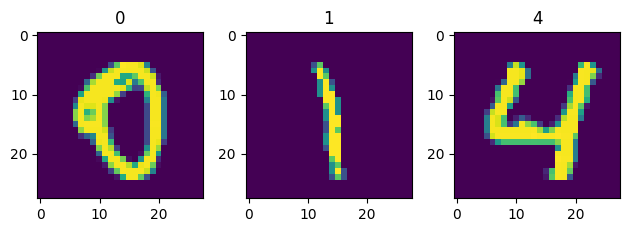

In [19]:

idx = np.random.randint(0, 60000, 3)

plt.figure(figsize=(20, 8))
fig, axs = plt.subplots(1, 3)
for i, ax in zip(idx, axs):
    ax.imshow(x_train[i])
    ax.set_title(y_train[i]);

plt.tight_layout()
plt.show();

# load a pretrain model

In [27]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [32]:
pretrained_model = ResNet50(include_top=False, weights='imagenet')

pretrained_model.summary()

94765736/94765736 [==============================] - 103s 1us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                        

In [42]:
from keras.layers import Input, Dense, Flatten
from keras import Model


inp = Input(shape=(28, 28))
x = Flatten()(inp)
x = Dense(256, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

model = Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dense_25 (Dense)            (None, 512)               131584    
                                                                 
 dense_26 (Dense)            (None, 1024)              525312    
                                                                 
 dense_27 (Dense)            (None, 10)                10250     
                                                                 
Total params: 868,106
Trainable params: 868,106
Non-trainab

In [44]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test), validation_batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1867 - acc: 0.9474 - val_loss: 0.1551 - val_acc: 0.9578
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1744 - acc: 0.9536 - val_loss: 0.2028 - val_acc: 0.9533
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1546 - acc: 0.9605 - val_loss: 0.1446 - val_acc: 0.9609
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - acc: 0.9662 - val_loss: 0.1445 - val_acc: 0.9619
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1125 - acc: 0.9714 - val_loss: 0.1759 - val_acc: 0.9587


In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = np.argmax(model.predict(x_test), axis=-1)

confusion_matrix(y_test, y_pred)

313/313 [==============================] - 0s 1ms/step


array([[ 967,    0,    4,    0,    0,    3,    1,    1,    3,    1],
       [   0, 1119,    0,    5,    0,    1,    1,    2,    7,    0],
       [   2,    4,  931,   45,    3,    1,    0,   34,   12,    0],
       [   0,    1,    4,  978,    0,   13,    0,    6,    4,    4],
       [   0,    1,    2,    0,  962,    0,    5,    1,    1,   10],
       [   4,    0,    0,    9,    2,  869,    1,    0,    3,    4],
       [   6,    8,    1,    1,    7,   32,  901,    0,    2,    0],
       [   1,    1,    3,    7,    4,    0,    0,  978,    6,   28],
       [   5,    2,    2,   10,    6,   17,    3,    4,  919,    6],
       [   1,    2,    0,    4,   23,    7,    1,    5,    3,  963]],
      dtype=int64)

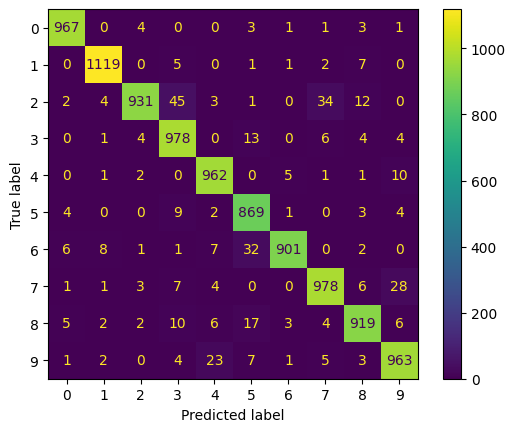

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

disp.plot()

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.90      0.94      1032
           3       0.92      0.97      0.95      1010
           4       0.96      0.98      0.97       982
           5       0.92      0.97      0.95       892
           6       0.99      0.94      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [83]:
model.save('./pretrained_model')

INFO:tensorflow:Assets written to: ./pretrained_model\assets


# LoRa fine-tuning

In [60]:
model = tf.keras.models.load_model('./pretrained_model')

lets fine-tune our model on 2 only cuz it has low recall  
our model is almost 1M parameters so we will use LoRa as a fine-tuning method


In [61]:
#first we will write LoRa layer
import math
from keras.layers import Layer, Dense

class LoRA(Layer):
    def __init__(self,
                 original_layer: Dense, 
                 rank: int = 1, 
                 alpha: int = 1, 
                 trainable: bool = False,
                 **kwargs) -> None:
        
        self.original_layer = original_layer
        name = self.original_layer._name
        kwargs.pop("name", None)

        super().__init__(name=name, trainable=trainable, **kwargs)

        self.trainable = trainable
        self._scale = alpha // rank
        self.original_layer.trainable = False

        self.A = Dense(units=rank, 
                       use_bias=False, 
                       kernel_initializer=tf.keras.initializers.VarianceScaling(scale=math.sqrt(5), mode="fan_in", distribution="uniform"),
                       trainable=trainable,
                       name='lora_A')
        
        self.B = Dense(units=original_layer.output_shape[-1],
                       use_bias=False,
                       kernel_initializer='zeros',
                       trainable=trainable,
                       name='lora_B')
        

    def call(self, x):
        original_outputs = self.original_layer(x)
        if self.trainable:
            lora_outputs = self.B(self.A(x)) * self._scale
            return original_outputs + lora_outputs
        
        return original_outputs
        

In [62]:
from keras import Model
layers = [l for l in model.layers]

x = layers[0].output
for layer in layers:
    if 'dense' in layer.name:
        x = LoRA(layer, trainable=True)(x)
    else:
        x = layer(x)

lora_model = Model(inputs=layers[0].input, outputs=x)
lora_model.summary()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_10'), name='input_10', description="created by layer 'input_10'")
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          multiple             0           ['input_10[0][0]']               
                                                                                                  
 flatten_3 (Flatten)            (None, 784)          0           ['input_10[1][0]']               
                                                                                                  
 dense_24 (LoRA)                (None, 256)          202000      ['flatten_3[1][0]']              
                      

In [63]:
fine_tune_2_train = x_train[(y_train == 2)]
fine_tune_2_label = y_train[(y_train == 2)]

assert len(fine_tune_2_train) == len(fine_tune_2_label)

In [64]:
lora_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [65]:
lora_model.fit(fine_tune_2_train, fine_tune_2_label, epochs=2)

Epoch 1/2
187/187 [==============================] - 1s 4ms/step - loss: 0.0090 - acc: 0.9975
Epoch 2/2
187/187 [==============================] - 1s 3ms/step - loss: 4.9502e-04 - acc: 0.9998


In [66]:
from sklearn.metrics import classification_report

y_pred = np.argmax(lora_model.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       980
           1       1.00      0.84      0.91      1135
           2       0.14      1.00      0.25      1032
           3       1.00      0.32      0.49      1010
           4       1.00      0.54      0.70       982
           5       1.00      0.41      0.58       892
           6       1.00      0.33      0.49       958
           7       1.00      0.00      0.01      1028
           8       1.00      0.10      0.19       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.36     10000
   macro avg       0.81      0.36      0.36     10000
weighted avg       0.81      0.36      0.37     10000



c:\Users\mahmoud\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmoud\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mahmoud\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
